In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Flatten, Dense, Dropout
import math
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Load the restaurants
business_df = pd.read_csv('./Project/merged.csv', low_memory=False)
business_df = business_df.drop(['business_id', 'stars', 'normalized_sentiment'], axis=1)
business_df.replace({False: 0, True: 1, 'False': 0, 'True': 1, None: 0, 'None': 0}, inplace=True)
business_df['score'] = round(business_df['score'], 0)
scores = {1.0: 0, 2.0:1, 3.0:2, 4.0:3, 5.0:4, 6.0:5, 7.0:6, 8.0:7, 9.0:8, 10.0:9}
business_df['score'] = business_df['score'].map(scores)
business_df.head()

,Coffee & Tea,Food,Bakeries,Burgers,Sandwiches,Fast Food,Ice Cream & Frozen Yogurt,Bars,American (Traditional),Nightlife,Pubs,Italian,Food Trucks,Diners,Breakfast & Brunch,Delis,Japanese,Sushi Bars,Cafes,Steakhouses,Asian Fusion,Seafood,Cocktail Bars,Chicken Wings,Pizza,Soup,Salad,Arts & Entertainment,Specialty Food,Chinese,Caterers,Event Planning & Services,American (New),Sports Bars,Juice Bars & Smoothies,Mexican,Mediterranean,Wine & Spirits,Beer,Barbeque,Vegetarian,Desserts,Tacos,OutdoorSeating,CoatCheck,Caters,HappyHour,DriveThru,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTakeOut,RestaurantsGoodForGroups,review_count,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_None,Alcohol_nan,Alcohol_u'beer_and_wine',Alcohol_u'full_bar',Alcohol_u'none',Alcohol_nan.1,RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_'formal',RestaurantsAttire_None,RestaurantsAttire_nan,RestaurantsAttire_u'casual',RestaurantsAttire_u'dressy',RestaurantsAttire_u'formal',RestaurantsAttire_nan.1,score
0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,80,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,8
1,0,1,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,1,1,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,4
2,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1,0,1,1,19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6
3,0,1,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,1,0,10,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5
4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,10,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8


In [3]:
# Starting to split the data into train and test sets

# Shuffle the rows randomly
business_df = business_df.sample(frac=1).reset_index(drop=True)

# Split data into training and testing sets
X = business_df.loc[:, business_df.columns != 'score']
X = np.asarray(X).astype(np.float32)

y = business_df['score']
y_encoded = tf.keras.utils.to_categorical(y, num_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [4]:
# Build the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(71,)))
model.add(Dense(units=10, activation='softmax'))  # Output layer with 10 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

C:\Users\mayaf\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2586/2586 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3277 - loss: 1.8963 - val_accuracy: 0.3825 - val_loss: 1.8288
Epoch 2/10
2586/2586 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3687 - loss: 1.6062 - val_accuracy: 0.3545 - val_loss: 1.5407
Epoch 3/10
2586/2586 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3785 - loss: 1.5077 - val_accuracy: 0.3420 - val_loss: 2.4973
Epoch 4/10
2586/2586 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3783 - loss: 1.5166 - val_accuracy: 0.3916 - val_loss: 1.4532
Epoch 5/10
2586/2586 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3909 - loss: 1.4614 - val_accuracy: 0.3971 - val_loss: 1.4077
Epoch 6/10
2586/2586 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3929 - loss: 1.4402 - val_accuracy: 0.3989 - val_loss: 1.4336
Epoch 7/10
2586/2586 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3941 - loss: 1.4405 - val_accuracy: 0.3978 - val_loss: 1.3994
Epoch 8/10
2586/2586 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3958 - loss: 1.4148 - 

In [5]:
# Test a restaurant similar to Five Guys to see what the model would predict
new_data = [[0, 1, 0, 1, 1,
       1, 1, 0,
       1, 0, 0, 0, 0,
       0, 0, 0, 0, 0,
       0, 0, 0, 0, 0,
       0, 0, 0, 0, 0,
       0, 0, 1, 0,
       0, 0, 0, 0,
       0, 0, 0, 0, 0,
       1, 0, 0, 0, 1,
       0, 0, 1,
       0, 1,
       1, 1114,
       0, 0, 1,
       0, 0, 0,
       0, 0, 0,
       0, 0,
       0, 1,
       0, 0,
       0, 0,
       0]]
new_data = np.array(new_data)
predicted_probs = model.predict(new_data)
predicted_labels = np.argmax(predicted_probs, axis=1)

print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[8]


In [6]:
# Load the reviews
review_df = pd.read_csv('./Project/reviews_with_sentiments.csv')
review_df.head()

,review_id,user_id,business_id,stars,text,name,categories,sentiment_score,normalized_sentiment,score
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,"If you decide to eat here, just be aware it is...",Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B...",0.8597,5.0,8.0
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,Family diner. Had the buffet. Eclectic assortm...,Kettle Restaurant,"Restaurants, Breakfast & Brunch",0.9201,5.0,8.0
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,"Wow! Yummy, different, delicious. Our favo...",Zaika,"Halal, Pakistani, Restaurants, Indian",0.9588,5.0,10.0
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,Cute interior and owner (?) gave us tour of up...,Melt,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",0.9804,5.0,9.0
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,I am a long term frequent customer of this est...,Dmitri's,"Mediterranean, Restaurants, Seafood, Greek",0.7117,4.0,5.0


In [7]:
# General : smOvOajNG0lS4Pq7d8g4JQ
# Positive Reviews : DBYhpb5hrAYgQjQaMhNYyQ
# Negative Reviews : ZEpBNNP_btQrZ5qaByoZkg

In [8]:
# Create the new data frames for each user
neu_review_df = review_df.drop(review_df[review_df['user_id'] == 'smOvOajNG0lS4Pq7d8g4JQ'].index)

pos_review_df = review_df.drop(review_df[review_df['user_id'] == 'DBYhpb5hrAYgQjQaMhNYyQ'].index)

neg_review_df = review_df.drop(review_df[review_df['user_id'] == 'ZEpBNNP_btQrZ5qaByoZkg'].index)

In [9]:
# Updating the data so we update the score column for each user
avg_sentiment_by_business_neu = neu_review_df.groupby(by=['business_id'])['score'].mean()
avg_sentiment_by_business_pos = pos_review_df.groupby(by=['business_id'])['score'].mean()
avg_sentiment_by_business_neg = neg_review_df.groupby(by=['business_id'])['score'].mean()

df = pd.read_csv('./Project/merged.csv', low_memory=False)

df = df.dropna()
df = df.drop(['stars', 'score'], axis=1)
df.replace({False: 0, True: 1, 'False': 0, 'True': 1, None: 0, 'None': 0}, inplace=True)

neu_df = df.merge(avg_sentiment_by_business_neu, on='business_id', how='left')
pos_df = df.merge(avg_sentiment_by_business_pos, on='business_id', how='left')
neg_df = df.merge(avg_sentiment_by_business_neg, on='business_id', how='left')

neu_df.drop(['business_id'], axis=1)
pos_df.drop(['business_id'], axis=1)
neg_df.drop(['business_id'], axis=1)

neu_df['score'] = round(neu_df['score'], 0)
pos_df['score'] = round(pos_df['score'], 0)
neg_df['score'] = round(neg_df['score'], 0)

scores = {1.0: 0, 2.0:1, 3.0:2, 4.0:3, 5.0:4, 6.0:5, 7.0:6, 8.0:7, 9.0:8, 10.0:9}
neu_df['score'] = neu_df['score'].map(scores)
pos_df['score'] = pos_df['score'].map(scores)
neg_df['score'] = neg_df['score'].map(scores)

neu_df = neu_df.drop(['business_id', 'normalized_sentiment'], axis=1)
pos_df = pos_df.drop(['business_id', 'normalized_sentiment'], axis=1)
neg_df = neg_df.drop(['business_id', 'normalized_sentiment'], axis=1)

neu_df.head()

,Coffee & Tea,Food,Bakeries,Burgers,Sandwiches,Fast Food,Ice Cream & Frozen Yogurt,Bars,American (Traditional),Nightlife,Pubs,Italian,Food Trucks,Diners,Breakfast & Brunch,Delis,Japanese,Sushi Bars,Cafes,Steakhouses,Asian Fusion,Seafood,Cocktail Bars,Chicken Wings,Pizza,Soup,Salad,Arts & Entertainment,Specialty Food,Chinese,Caterers,Event Planning & Services,American (New),Sports Bars,Juice Bars & Smoothies,Mexican,Mediterranean,Wine & Spirits,Beer,Barbeque,Vegetarian,Desserts,Tacos,OutdoorSeating,CoatCheck,Caters,HappyHour,DriveThru,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTakeOut,RestaurantsGoodForGroups,review_count,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_None,Alcohol_nan,Alcohol_u'beer_and_wine',Alcohol_u'full_bar',Alcohol_u'none',Alcohol_nan.1,RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_'formal',RestaurantsAttire_None,RestaurantsAttire_nan,RestaurantsAttire_u'casual',RestaurantsAttire_u'dressy',RestaurantsAttire_u'formal',RestaurantsAttire_nan.1,score
0,0,1,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,1,1,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,4
1,0,1,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,0,1,0,10,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5
2,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,2,1,1,1,95,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,8
3,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,2,0,1,1,182,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,8
4,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,2,1,1,1,284,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6


In [10]:
# Fine Tune the CNN model with the Neutral Review Data

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, clone_model
from tensorflow.keras.optimizers import Adam

neu_model = clone_model(model)

neu_df = neu_df.sample(frac=1).reset_index(drop=True)

# Split data into training and testing sets
X_neu = neu_df.loc[:, neu_df.columns != 'score']
X_neu = np.asarray(X_neu).astype(np.float32)

y_neu = neu_df['score']
y_neu_encoded = tf.keras.utils.to_categorical(y_neu, num_classes=10)
X_train_neu, X_test_neu, y_train_neu, y_test_neu = train_test_split(X_neu, y_neu_encoded, test_size=0.2, random_state=42)

neu_model.add(Dense(units=64, activation='relu'))
neu_model.add(Dense(units=10, activation='softmax'))

# Freeze layers from the base model
for layer in model.layers:
    layer.trainable = False

optimizer = Adam(learning_rate=.001)

# Compile the model
neu_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on your dataset
neu_model.fit(X_train_neu, y_train_neu, epochs=10, batch_size=8, validation_data=(X_test_neu, y_test_neu))

# Evaluate the fine-tuned model on a test set
test_loss, test_accuracy = neu_model.evaluate(X_test_neu, y_test_neu)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2113 - loss: 2.2568 - val_accuracy: 0.3509 - val_loss: 2.0016
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3552 - loss: 1.9519 - val_accuracy: 0.3860 - val_loss: 1.7391
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4005 - loss: 1.7163 - val_accuracy: 0.3947 - val_loss: 1.5242
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3706 - loss: 1.5214 - val_accuracy: 0.3772 - val_loss: 1.5123
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4014 - loss: 1.4836 - val_accuracy: 0.4386 - val_loss: 1.3082
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4444 - loss: 1.3439 - val_accuracy: 0.4211 - val_loss: 1.2671
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4257 - loss: 1.2819 - val_accuracy: 0.4211 - val_loss: 1.2248
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4260 - loss: 1.2443 - val_accuracy: 0.4386 - val_loss:

In [11]:
# Test a restaurant similar to Five Guys to see what the neutral model would predict
predicted_probs = neu_model.predict(new_data)
predicted_labels = np.argmax(predicted_probs, axis=1)

print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[7]


In [12]:
# Fine Tune the CNN model with the Positive Review User

pos_model = clone_model(model)

pos_df = pos_df.sample(frac=1).reset_index(drop=True)

# Split data into training and testing sets
X_pos = pos_df.loc[:, pos_df.columns != 'score']
X_pos = np.asarray(X_pos).astype(np.float32)

y_pos = pos_df['score']
y_pos_encoded = tf.keras.utils.to_categorical(y_pos, num_classes=10)
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos_encoded, test_size=0.2, random_state=42)

pos_model.add(Dense(units=64, activation='relu'))
pos_model.add(Dense(units=10, activation='softmax'))

# Freeze layers from the base model
for layer in model.layers:
    layer.trainable = False

optimizer = Adam(learning_rate=.001)

# Compile the model
pos_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on your dataset
pos_model.fit(X_train_pos, y_train_pos, epochs=10, batch_size=8, validation_data=(X_test_pos, y_test_pos))

# Evaluate the fine-tuned model on a test set
test_loss, test_accuracy = pos_model.evaluate(X_test_pos, y_test_pos)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2270 - loss: 2.2309 - val_accuracy: 0.3772 - val_loss: 1.9369
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2884 - loss: 1.8716 - val_accuracy: 0.3772 - val_loss: 1.6812
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3486 - loss: 1.6160 - val_accuracy: 0.4035 - val_loss: 1.5431
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3257 - loss: 1.4889 - val_accuracy: 0.4474 - val_loss: 1.3619
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4419 - loss: 1.3432 - val_accuracy: 0.4825 - val_loss: 1.2828
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3935 - loss: 1.3576 - val_accuracy: 0.3421 - val_loss: 1.2375
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4467 - loss: 1.2297 - val_accuracy: 0.4825 - val_loss: 1.2051
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3812 - loss: 1.2507 - val_accuracy: 0.4561 - val_loss:

In [13]:
# Test a restaurant similar to Five Guys to see what the positive model would predict
predicted_probs = pos_model.predict(new_data)
predicted_labels = np.argmax(predicted_probs, axis=1)

print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[7]


In [14]:
# Fine Tune the CNN model with the Negative Review User

neg_model = clone_model(model)

neg_df = neg_df.sample(frac=1).reset_index(drop=True)

# Split data into training and testing sets
X_neg = neg_df.loc[:, neg_df.columns != 'score']
X_neg = np.asarray(X_neg).astype(np.float32)

y_neg = neg_df['score']
y_neg_encoded = tf.keras.utils.to_categorical(y_neg, num_classes=10)
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg, y_neg_encoded, test_size=0.2, random_state=42)

neg_model.add(Dense(units=64, activation='relu'))
neg_model.add(Dense(units=10, activation='softmax'))

# Freeze layers from the base model
for layer in model.layers:
    layer.trainable = False

optimizer = Adam(learning_rate=.001)

# Compile the model
neg_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on your dataset
neg_model.fit(X_train_neg, y_train_neg, epochs=10, batch_size=8, validation_data=(X_test_neg, y_test_neg))

# Evaluate the fine-tuned model on a test set
test_loss, test_accuracy = neg_model.evaluate(X_test_neg, y_test_neg)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1847 - loss: 2.2657 - val_accuracy: 0.3070 - val_loss: 2.0206
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3242 - loss: 1.8993 - val_accuracy: 0.2982 - val_loss: 1.7062
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3366 - loss: 1.6465 - val_accuracy: 0.3596 - val_loss: 1.4951
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3870 - loss: 1.4402 - val_accuracy: 0.3772 - val_loss: 1.3783
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3992 - loss: 1.3740 - val_accuracy: 0.3860 - val_loss: 1.4420
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3678 - loss: 1.3548 - val_accuracy: 0.3509 - val_loss: 1.3381
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3950 - loss: 1.2601 - val_accuracy: 0.4123 - val_loss: 1.2475
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4121 - loss: 1.2304 - val_accuracy: 0.4035 - val_loss:

In [15]:
# Test a restaurant similar to Five Guys to see what the positive model would predict
predicted_probs = neg_model.predict(new_data)
predicted_labels = np.argmax(predicted_probs, axis=1)

print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[7]


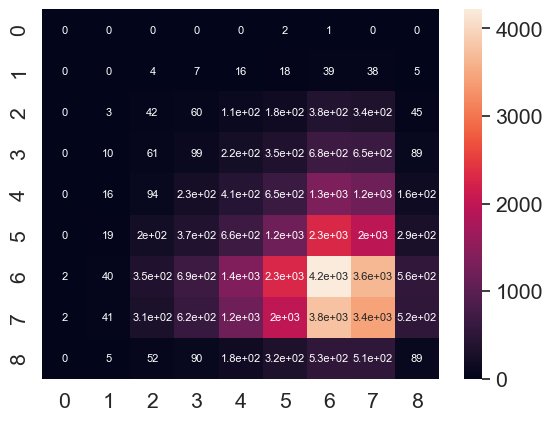

In [16]:
# Plot the confusion matrix for the general model
array = confusion_matrix(y_encoded[:41362].argmax(axis=1), y_train.argmax(axis=1),)

df_cm = pd.DataFrame(array, range(9), range(9))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}) # font size

plt.show()